<a href="https://colab.research.google.com/github/abhranil-datascience/RegressionPOC/blob/master/DecisionTreesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/Regression/DecisionTrees')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')
########### Import Dataset #############
import pandas as pd
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2].values

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
########### Feature Scaling ############
from sklearn.preprocessing import StandardScaler
XScaler=StandardScaler()
YScaler=StandardScaler()
XScaled=XScaler.fit_transform(X.reshape(-1,1))
YScaled=YScaler.fit_transform(Y.reshape(-1,1))
########## Decision Tree #############
from sklearn.tree import DecisionTreeRegressor
RegressorDT=DecisionTreeRegressor()
RegressorDT.fit(XScaled,YScaled)
YPred=YScaler.inverse_transform(RegressorDT.predict(XScaled))
import sklearn.metrics as mt
print("Goodness Of Fit: "+str(mt.r2_score(Y,YPred)))

Goodness Of Fit: 1.0


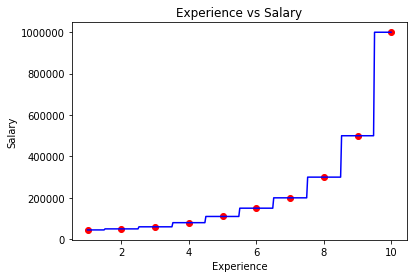

In [0]:
########## Draw Graph ###############
import matplotlib.pyplot as plt
plt.scatter(X,Y,c='red')
import numpy as np
XGrid=np.arange(min(XScaled),max(XScaled),0.01).reshape(-1,1)
plt.plot(XScaler.inverse_transform(XGrid),YScaler.inverse_transform(RegressorDT.predict(XGrid)),c='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()